# Setup

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [186]:
def setxTicks(ax, N = 5):
    xmin, xmax = ax.get_xlim()
    custom_ticks = np.linspace(xmin, xmax, N, dtype=int)
    ax.set_xticks(custom_ticks)
    ax.set_xticklabels(custom_ticks)

def plotP(flist, obsf, labels,
             starname = '',
             syntdir = "/home/morgan/Turbospectrum2019/COM-v19.1/syntspec/",
             apogdir = "/home/morgan/PhD/Data/apogee/dr14/",
             offset = 0, offsety = 0):
    """
    This function will plot the region around the lines of P, S and K in the IR with the input for a list of synthetic spectra and a APOGEE one
    :param flistac:  List of names of files containing the synthetic spectra used for the P lines, around 15600 and 16600, 
                as to include the PI line in 16482.9, in flux per wavelength
    :param flistbc:  List of name of files containing the synthetic spectra in the range for the S and K lines, 
                from 15000 to 16000.
    :param obsf:  Name of the file containing the observed spectra from APOGEE. 
                This spectra is not normalized, so additional normalization parameters should be entered as well
    :param norm: Normalization parameters to be divided from flux values, one for each range around the interested lines, to be entered manually for each input star. 
                Five parameters, ordered for: PI 15711.6, PI 16482.9, KI 15163.067 and KI 15168.376, SI 15469.8036, SI 15475.604 and SI 15478.469.
    """

    fname = apogdir + obsf
    apogdata = pd.read_csv(fname, sep='\s+', header=None, names=["Wavelength", "Flux"], comment="#")
    
    specdata = []
    
    for f in flist:
        fname = syntdir + f
        specdata.append(pd.read_csv(fname, sep='\s+', header=None, names=["Wavelength", "Flux"]))

    norm = [apogdata[apogdata['Wavelength'].between(15702,15720)]['Flux'].median(),
           apogdata[apogdata['Wavelength'].between(16480,16490)]['Flux'].median()]
    
    # These set of parameters are the limits of each plot, around the zones containing our lines of interest
    lim1 = (15702,15720)
    lim2 = (16480,16488)
    # PI lines plots

    fig, ax = plt.subplots(2)

    ax[0].plot(apogdata["Wavelength"] + offset, apogdata["Flux"]/norm[0] + offsety, color="red")
    for d, l in zip(specdata, labels):
        ax[0].plot(d["Wavelength"], d["Flux"], label = l)

    ax[0].set_title("PI lines - " + starname)
    ax[0].set_xlim(*lim1)
    ax[0].set_ylim(0.84,1.01)
    ax[0].vlines(x = 15711.6, ymin = 0.85, ymax=0.90, color="purple") # PI 15711.6
    setxTicks(ax[0])

    
    ax[1].plot(apogdata["Wavelength"] + offset, apogdata["Flux"]/norm[1], color="red")
    for d, l in zip(specdata, labels):
        ax[1].plot(d["Wavelength"], d["Flux"], label = l)

    ax[1].set_xlim(*lim2)
    ax[1].set_ylim(0.84,1.01)
    ax[1].set_xlabel("Wavelength (A)")
    ax[1].vlines(x = 16482.9, ymin = 0.85, ymax=0.90, color="purple") # PI 16482.9
    setxTicks(ax[1])
    plt.legend(loc = 'lower left')
    plt.show()


    
def plotK(flist, obsf, labels,
             starname = '', 
             syntdir = "/home/morgan/Turbospectrum2019/COM-v19.1/syntspec/",
             apogdir = "/home/morgan/PhD/Data/apogee/dr14/",
             offset = 0):
    """
    This function will plot the region around the lines of P, S and K in the IR with the input for a list of synthetic spectra and a APOGEE one
    :param flistac:  List of names of files containing the synthetic spectra used for the P lines, around 15600 and 16600, 
                as to include the PI line in 16482.9, in flux per wavelength
    :param flistbc:  List of name of files containing the synthetic spectra in the range for the S and K lines, 
                from 15000 to 16000.
    :param obsf:  Name of the file containing the observed spectra from APOGEE. 
                This spectra is not normalized, so additional normalization parameters should be entered as well
    :param norm: Normalization parameters to be divided from flux values, one for each range around the interested lines, to be entered manually for each input star. 
                Five parameters, ordered for: PI 15711.6, PI 16482.9, KI 15163.067 and KI 15168.376, SI 15469.8036, SI 15475.604 and SI 15478.469.
    """

    fname = apogdir + obsf
    apogdata = pd.read_csv(fname, sep='\s+', header=None, names=["Wavelength", "Flux"], comment="#")
    
    specdata = []
    
                        
    for f in flist:
        fname = syntdir + f
        specdata.append(pd.read_csv(fname, sep='\s+', header=None, names=["Wavelength", "Flux"]))

    norm = apogdata[apogdata['Wavelength'].between(15155,15175)]['Flux'].median()
    
    # These set of parameters are the limits of each plot, around the zones containing our lines of interest
    lim = (15160, 15170)

    # KI lines plot

    fig, ax = plt.subplots()

    ax.plot(apogdata["Wavelength"] + offset, apogdata["Flux"]/norm, color="red")
    for d, l in zip(specdata, labels):
        ax.plot(d["Wavelength"], d["Flux"], label = l)

    ax.set_title("KI lines - " + starname)
    ax.set_xlim(*lim)
    ax.set_ylim(0.8,1.01)
    ax.vlines(x = [15163.067, 15168,376], ymin = 0.8, ymax=0.825, color="purple") # KI 15163.067 and KI 15168.376
    setxTicks(ax)
    plt.legend(loc = 'lower left')
    plt.show()



    
def plotS(flist, obsf, labels,
             starname = '', 
             syntdir = "/home/morgan/Turbospectrum2019/COM-v19.1/syntspec/",
             apogdir = "/home/morgan/PhD/Data/apogee/dr14/",
             offset = 0):
    """
    This function will plot the region around the lines of P, S and K in the IR with the input for a list of synthetic spectra and a APOGEE one
    :param flistac:  List of names of files containing the synthetic spectra used for the P lines, around 15600 and 16600, 
                as to include the PI line in 16482.9, in flux per wavelength
    :param flistbc:  List of name of files containing the synthetic spectra in the range for the S and K lines, 
                from 15000 to 16000.
    :param obsf:  Name of the file containing the observed spectra from APOGEE. 
                This spectra is not normalized, so additional normalization parameters should be entered as well
    :param norm: Normalization parameters to be divided from flux values, one for each range around the interested lines, to be entered manually for each input star. 
                Five parameters, ordered for: PI 15711.6, PI 16482.9, KI 15163.067 and KI 15168.376, SI 15469.8036, SI 15475.604 and SI 15478.469.
    """

    fname = apogdir + obsf
    apogdata = pd.read_csv(fname, sep='\s+', header=None, names=["Wavelength", "Flux"], comment="#")
    
    specdata = []
    
    for f in flist:
        fname = syntdir + f
        specdata.append(pd.read_csv(fname, sep='\s+', header=None, names=["Wavelength", "Flux"]))

    norm = [apogdata[apogdata['Wavelength'].between(15465,15475)]['Flux'].median(),
           apogdata[apogdata['Wavelength'].between(15470,15485)]['Flux'].median()]
    
    # These set of parameters are the limits of each plot, around the zones containing our lines of interest
    lim1 = (15465, 15473)
    lim2 = (15472, 15482)

    fig, ax = plt.subplots(2)

    ax[0].plot(apogdata["Wavelength"] + offset, apogdata["Flux"]/norm[0], color="red")    
    for d, l in zip(specdata, labels):
        ax[0].plot(d["Wavelength"], d["Flux"], label = l)

    ax[0].set_title("SI lines - " + starname)
    ax[0].set_xlim(*lim1)
    ax[0].set_ylim(0.8,1.01)
    ax[0].vlines(x = 15469.8036, ymin = 0.85, ymax=0.9, color="purple") # SI 15469.8036
    setxTicks(ax[0])
    
    ax[1].plot(apogdata["Wavelength"] + offset, apogdata["Flux"]/norm[1], color="red")
    for d, l in zip(specdata, labels):
        ax[1].plot(d["Wavelength"], d["Flux"], label = l)
    
    ax[1].set_xlim(*lim2)
    ax[1].set_ylim(0.8,1.01)
    ax[1].set_xlabel("Wavelength (A)")
    ax[1].vlines(x = [15475.604, 15478.469], ymin = 0.85, ymax=0.9, color="purple") # SI 15475.604 and SI 15478.469
    setxTicks(ax[1])
    plt.legend(loc = 'lower left')
    plt.show()

<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:86: SyntaxWarning: invalid escape sequence '\s'
<>:93: SyntaxWarning: invalid escape sequence '\s'
<>:137: SyntaxWarning: invalid escape sequence '\s'
<>:143: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:86: SyntaxWarning: invalid escape sequence '\s'
<>:93: SyntaxWarning: invalid escape sequence '\s'
<>:137: SyntaxWarning: invalid escape sequence '\s'
<>:143: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_62457/2980914082.py:25: SyntaxWarning: invalid escape sequence '\s'
  apogdata = pd.read_csv(fname, sep='\s+', header=None, names=["Wavelength", "Flux"], comment="#")
/tmp/ipykernel_62457/2980914082.py:31: SyntaxWarning: invalid escape sequence '\s'
  specdata.append(pd.read_csv(fname, sep='\s+', header=None, names=["Wavelength", "Flux"]))
/tmp/ipykernel_62457/298091

# Bulge

## B1

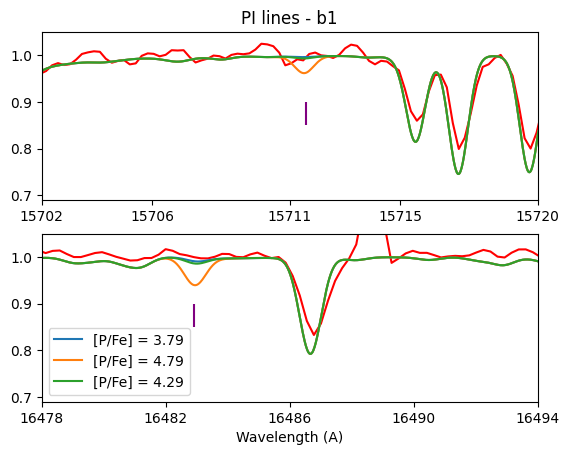

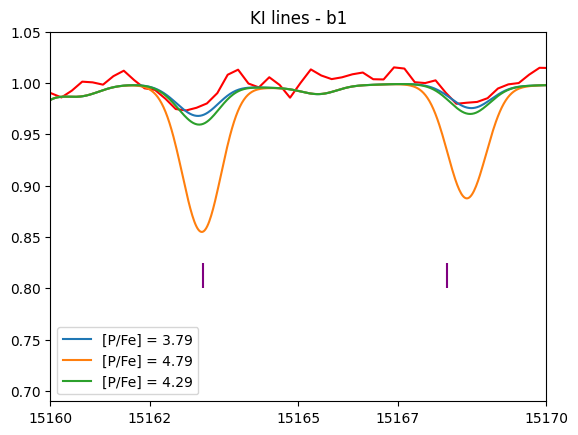

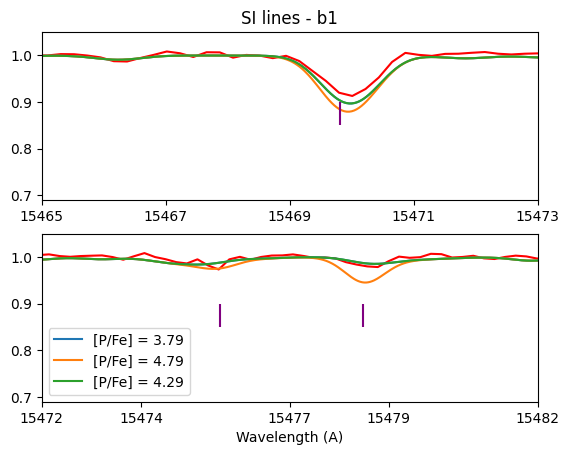

In [84]:
speclist = ["b1xac75.dat", "b1xap1c75.dat", "b1xap05c75.dat"]
starname = 'b1'
label = ['[P/Fe] = 3.79', '[P/Fe] = 4.79', '[P/Fe] = 4.29']
plotP(speclist, "b1.dat", label, starname)

speclist = ["b1xbc85.dat", "b1xbp1c85.dat", "b1xbk015c85.dat"]
label = ['[P/Fe] = 3.79', '[P/Fe] = 4.79', '[P/Fe] = 4.29']
plotK(speclist, "b1.dat", label, starname)
plotS(speclist, "b1.dat", label, starname)

## B2

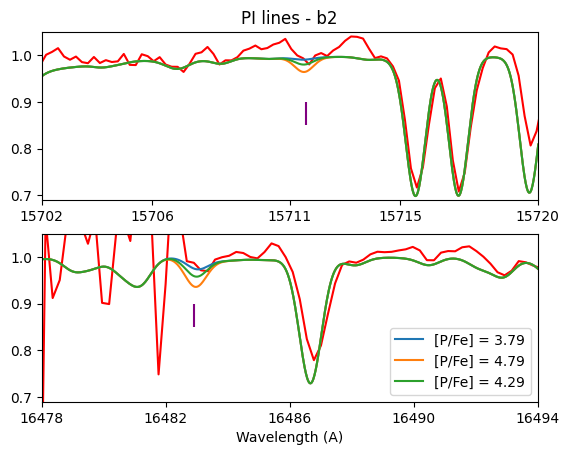

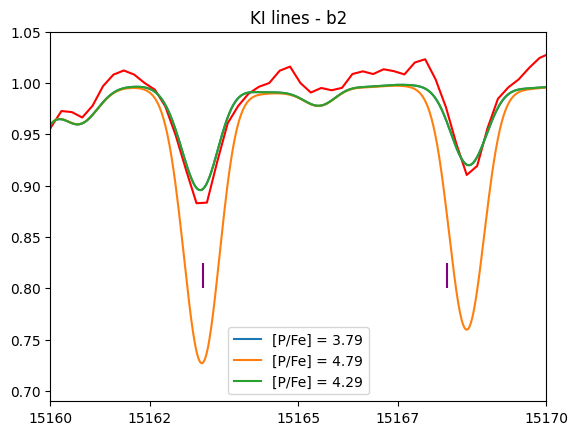

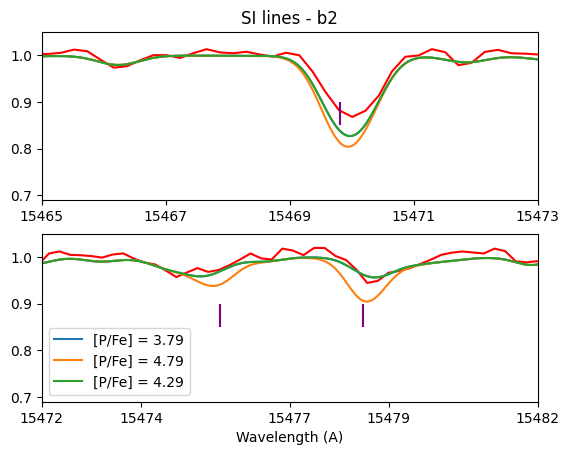

In [86]:
speclist = ["b2xac75.dat", "b2xap1c75.dat", "b2xap06c75.dat"]
starname = 'b2'
label = ['[P/Fe] = 3.79', '[P/Fe] = 4.79', '[P/Fe] = 4.29']
plotP(speclist, "b2.dat", label, starname)

speclist = ["b2xbc75.dat", "b2xbp1c75.dat", "b2xbc75.dat"]
label = ['[P/Fe] = 3.79', '[P/Fe] = 4.79', '[P/Fe] = 4.29']
plotK(speclist, "b2.dat", label, starname)
plotS(speclist, "b2.dat", label, starname)

## B3

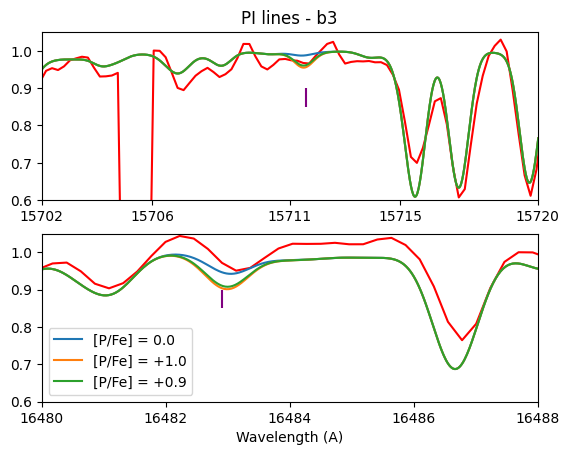

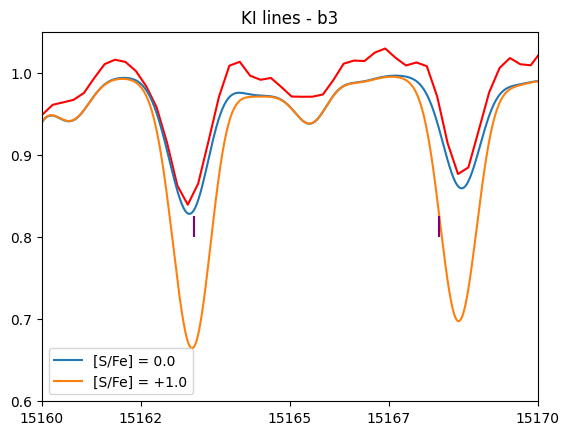

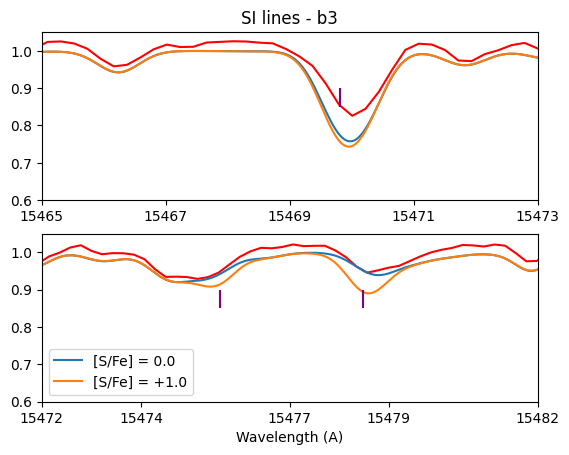

In [170]:
speclist = ["b3xac75.dat", "b3xap1c75.dat", "b3xap09c75.dat"]
starname = 'b3'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0', '[P/Fe] = +0.9']
plotP(speclist, "b3.dat", label, starname, offsety = -0.05)

speclist = ["b3xbc75.dat", "b3xbp1c75.dat"]
label = ['[S/Fe] = 0.0', '[S/Fe] = +1.0']
plotK(speclist, "b3.dat", label, starname)
plotS(speclist, "b3.dat", label, starname)

# N6558

## 44580

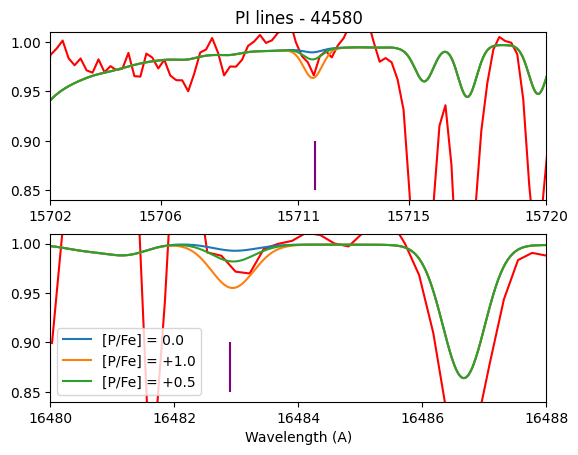

In [187]:
speclist = ["44580xa.dat", "44580xap1.dat", "44580xap05.dat"]
starname = '44580'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0', '[P/Fe] = +0.5']
plotP(speclist, "b2.dat", label, starname, offset = -0.15, offsety = -0.02)

## 46216

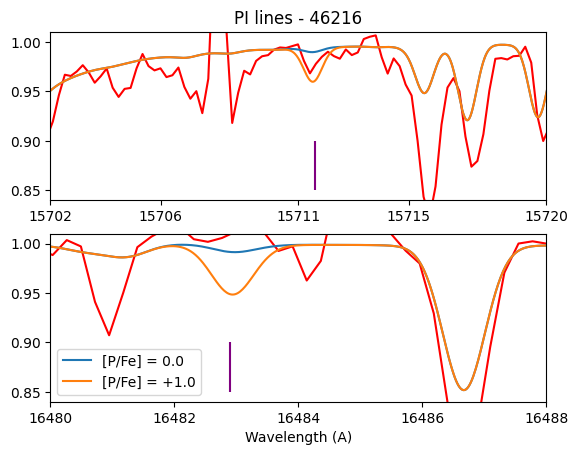

In [188]:
speclist = ["46216xa.dat", "46216xap1.dat"]
starname = '46216'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0']
plotP(speclist, "46216.dat", label, starname, offset = 5.9, offsety = -0.02)

## 46515

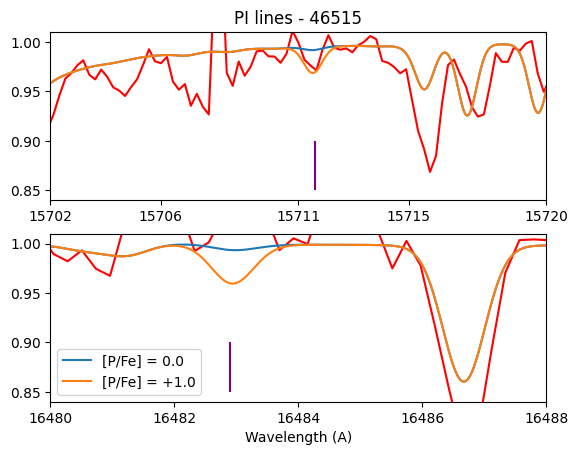

In [189]:
speclist = ["46515xa.dat", "46515xap1.dat"]
starname = '46515'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0']
plotP(speclist, "46515.dat", label, starname, offset = 6, offsety = -0.02)

## 45246

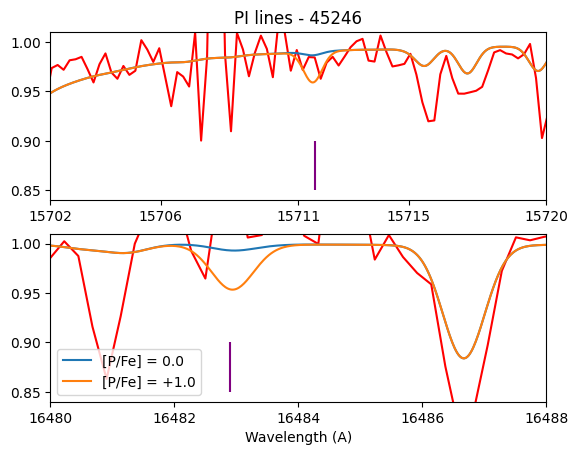

In [190]:
speclist = ["45246xa.dat", "45246xap1.dat"]
starname = '45246'
label = ['[P/Fe] = 0.0', '[P/Fe] = +1.0']
plotP(speclist, "45246.dat", label, starname, offset = 5.8, offsety = -0.02)